# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.metrics import(precision_score, recall_score, confusion_matrix, classification_report, accuracy_score)
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Dataset Description

**Dataset Link**

[Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)

In [ ]:
# Run this cell if you are using Google Colab
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Project/mushrooms.csv")
df.replace("NaN", np.nan, inplace=True)
df.head()

Mounted at /content/drive


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,NaN,o,NaN,n,n,m
3,p,x,y,w,t,p,NaN,c,n,n,...,s,w,w,p,NaN,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,NaN,g


In [ ]:
# If you are using Google Colab no need to run this cell.
df = pd.read_csv('Dataset/mushrooms.csv')
df.replace("NaN", np.nan, inplace=True)
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     7727 non-null   object
 1   cap-shape                 7737 non-null   object
 2   cap-surface               7760 non-null   object
 3   cap-color                 7731 non-null   object
 4   bruises                   7735 non-null   object
 5   odor                      7735 non-null   object
 6   gill-attachment           7714 non-null   object
 7   gill-spacing              7761 non-null   object
 8   gill-size                 7739 non-null   object
 9   gill-color                7704 non-null   object
 10  stalk-shape               7764 non-null   object
 11  stalk-root                7709 non-null   object
 12  stalk-surface-above-ring  7702 non-null   object
 13  stalk-surface-below-ring  7745 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.shape

(8124, 23)

### Target

In [ ]:
target = 'class'

### Bar Chart

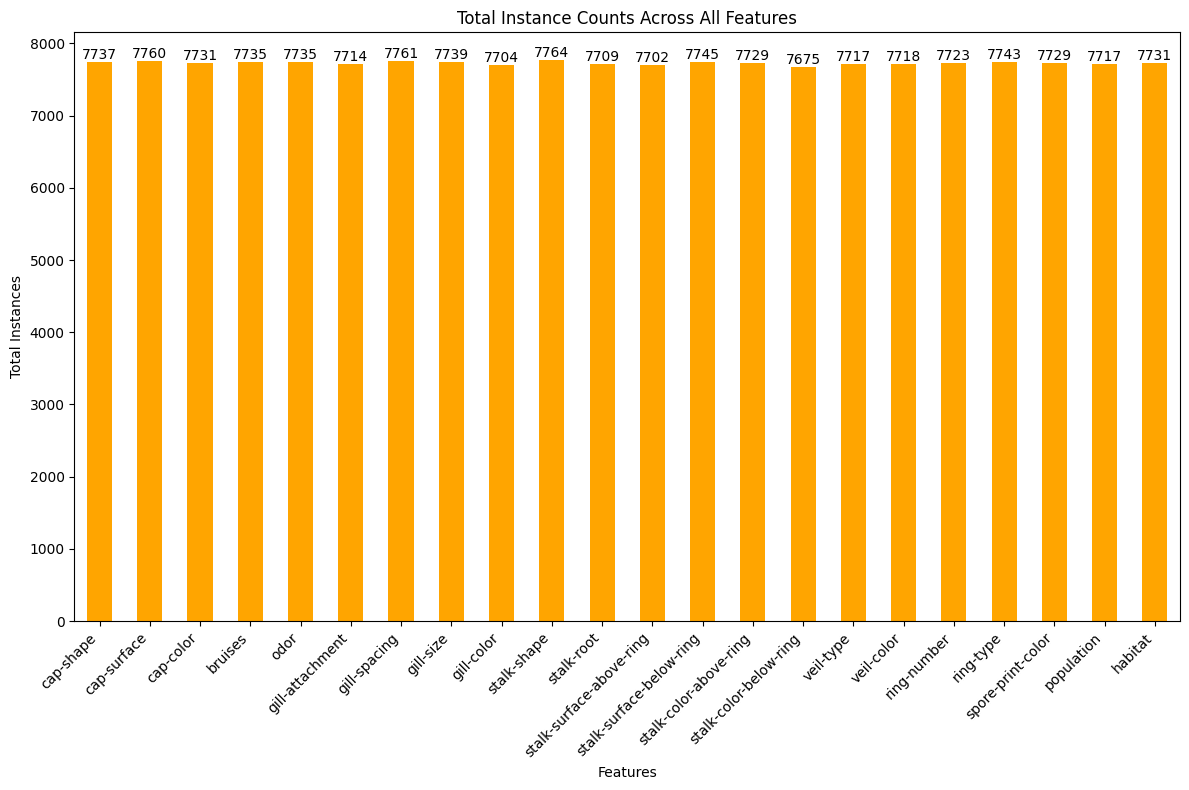

In [ ]:
totalCounts = df.loc[:, df.columns != target].count()

plt.figure(figsize=(12, 8))
bars = totalCounts.plot(kind='bar', color='orange')
plt.title('Total Instance Counts Across All Features')
plt.xlabel('Features')
plt.ylabel('Total Instances')

for i, value in enumerate(totalCounts):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Class Distribution

In [ ]:
# unique class & their counts in the dataset
classCounts = df[target].value_counts()
print(classCounts)

class
e    4014
p    3713
Name: count, dtype: int64


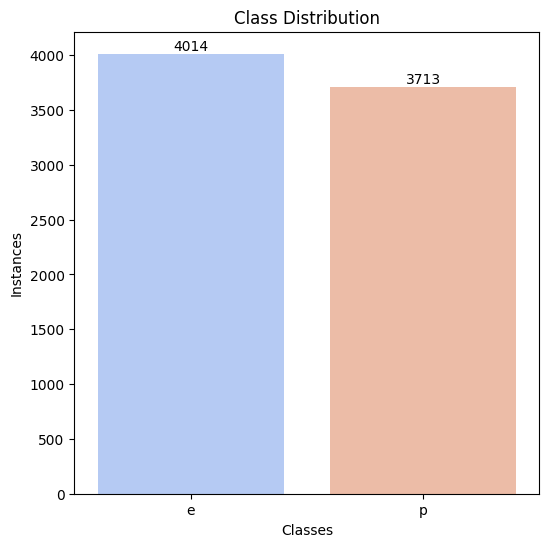

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x = classCounts.index, y = classCounts.values, palette = 'coolwarm', hue = classCounts.index, legend = False)

plt.xlabel('Classes')
plt.ylabel('Instances')
plt.title('Class Distribution')

for i, c in enumerate(classCounts.values):
    plt.text(i, c, str(c), ha = 'center', va = 'bottom')

plt.show()

# Categorical to Numerical

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert all categorical columns to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,4,1,5,3,2,3
3,1,5,3,8,1,6,2,0,1,5,...,2,7,7,0,4,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,6,1


# Correlation

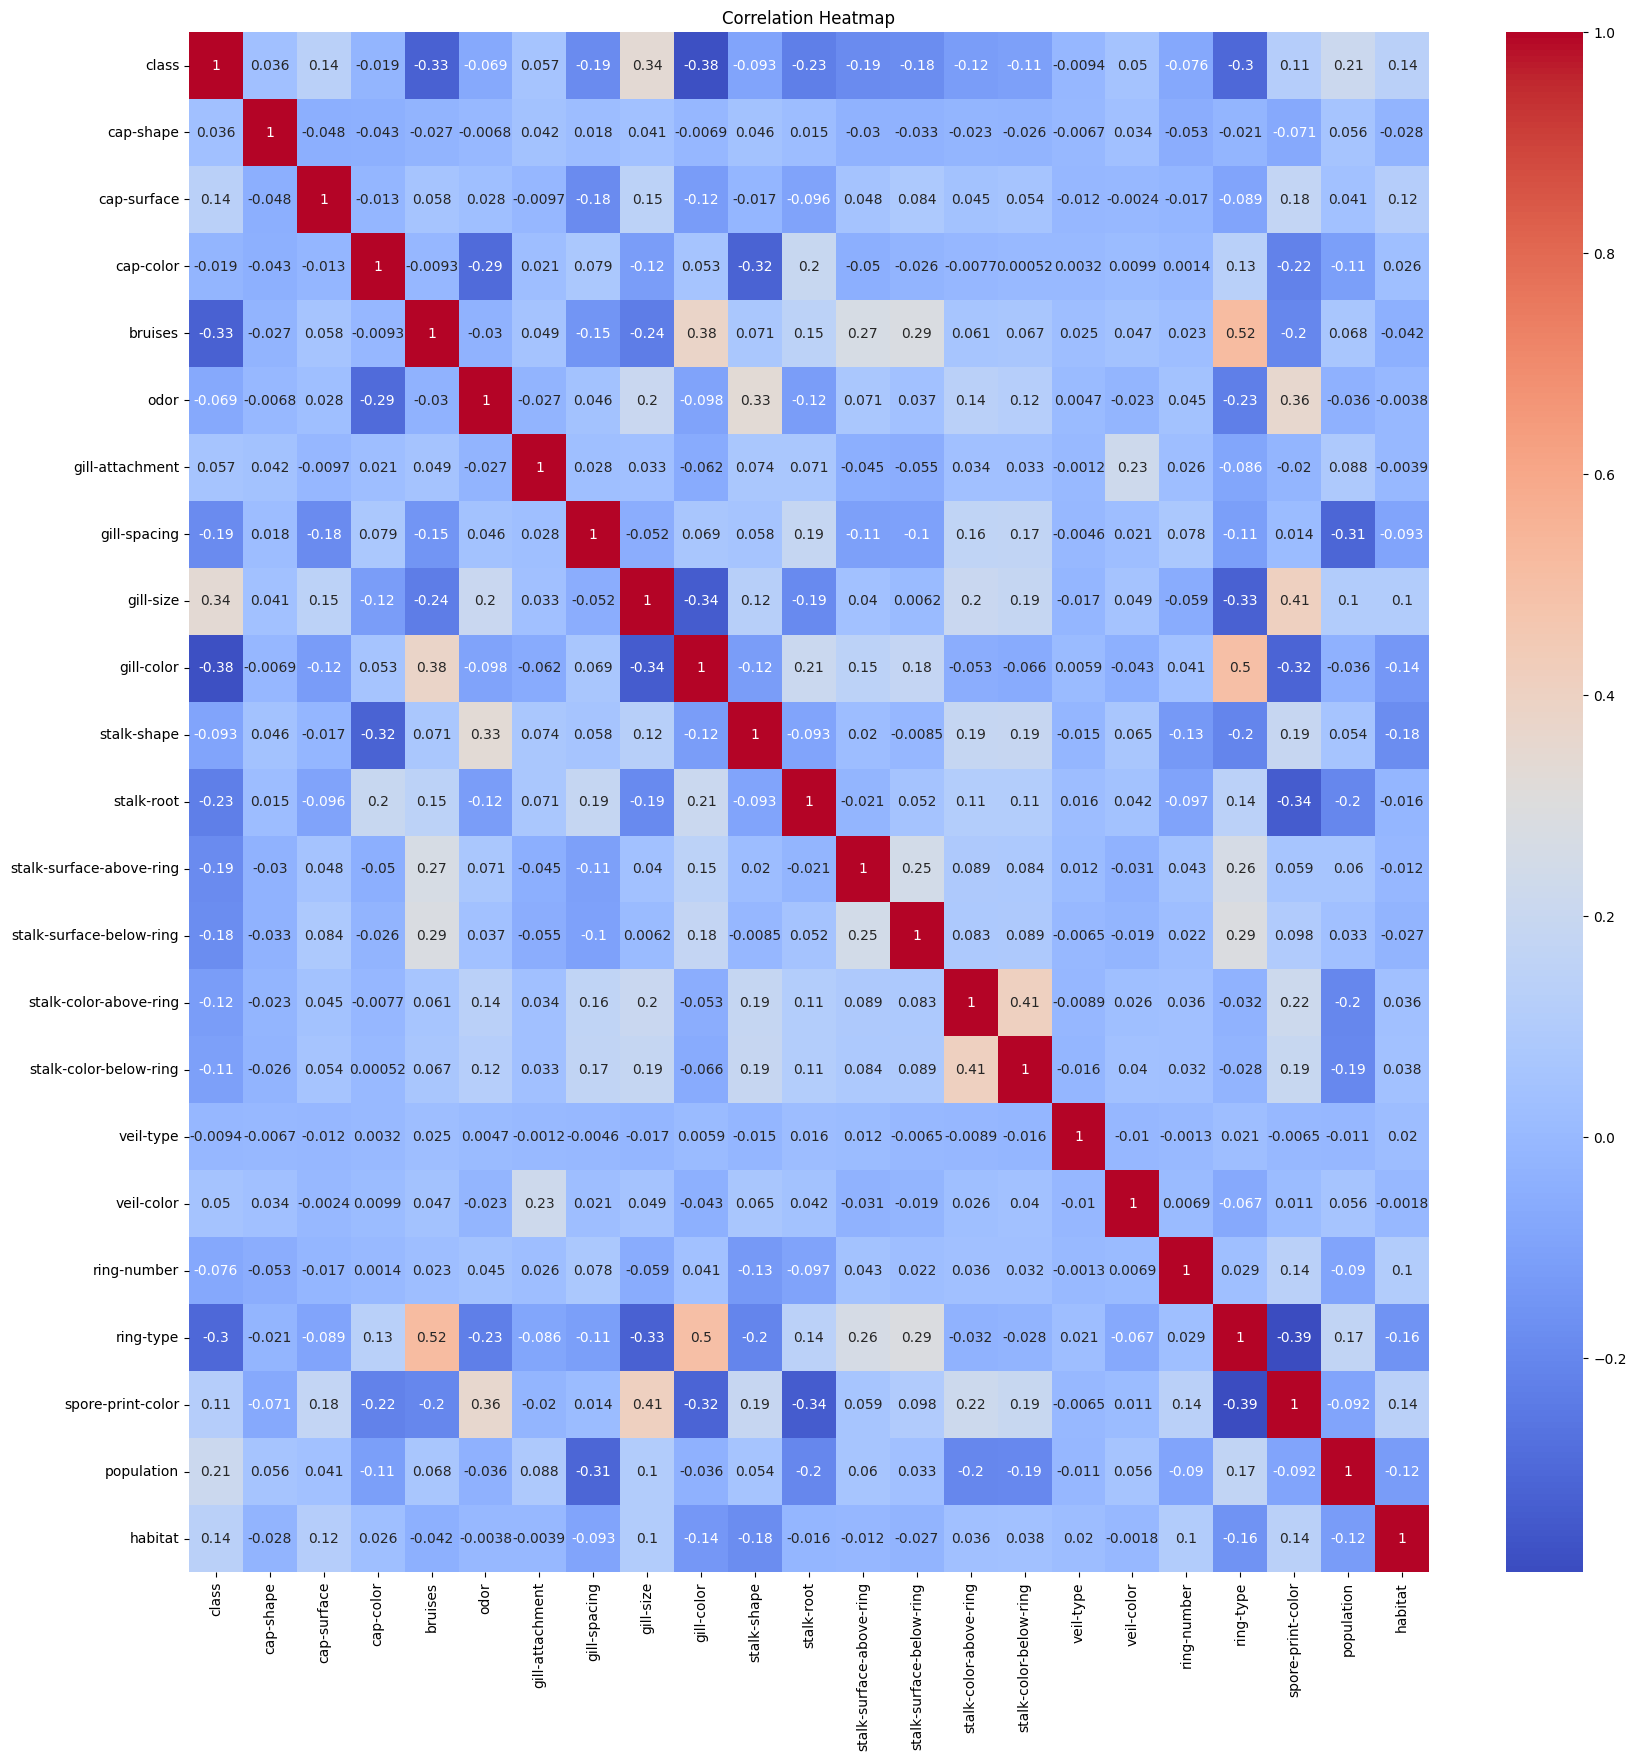

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
# Handling missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)  # Replace with mode for categorical
        else:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)  # Replace with median for numerical

In [ ]:
# Dropping veil-type column as it's only related to p class
df.drop(['veil-type'], axis=1, inplace=True)

# Drop NULL value rows
df = df.dropna(axis=0, how='any')

print(df.shape)

(8124, 22)


In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


# Scaling

In [ ]:
x = df.drop(target, axis=1)
y = df[target]

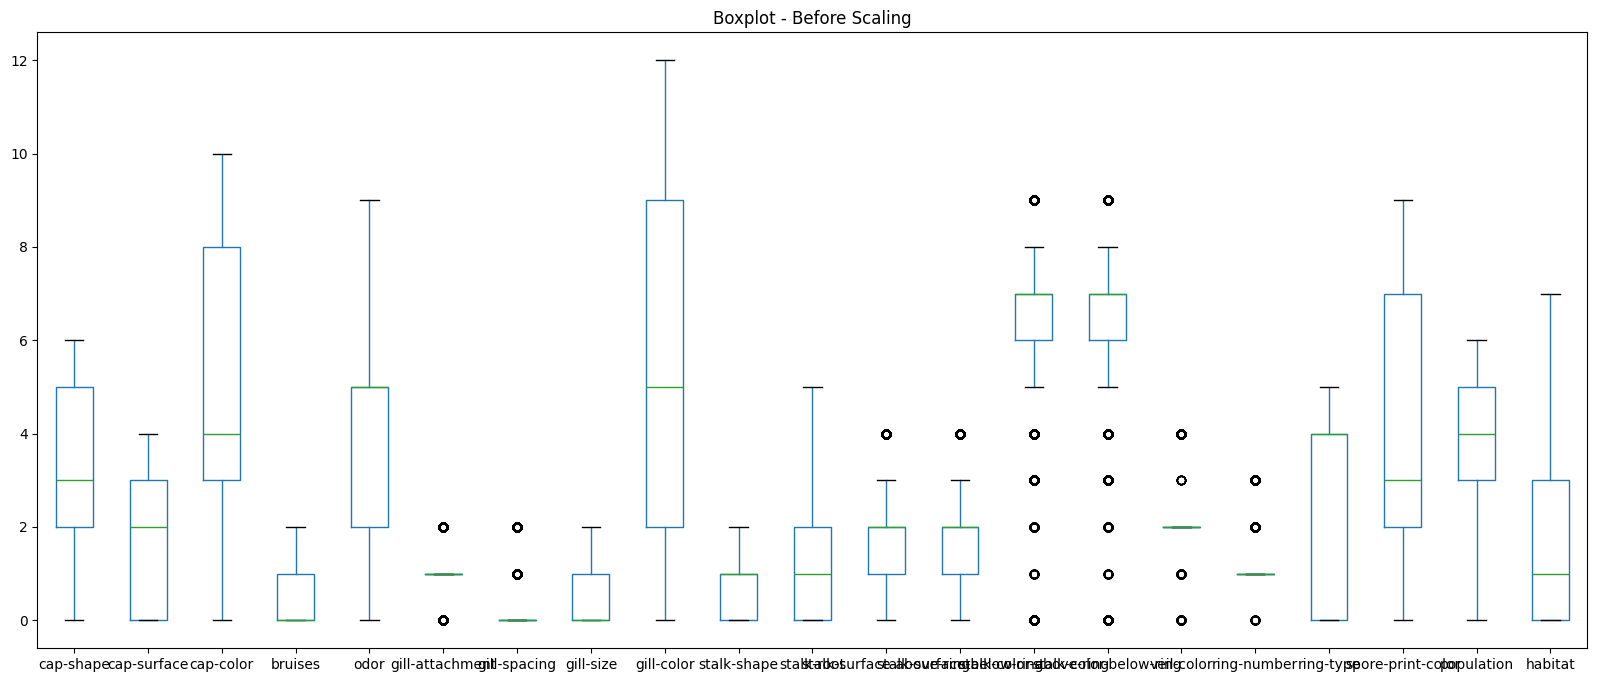

In [ ]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - Before Scaling')
plt.show()

In [ ]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.5,0.833333,0.50,0.4,0.5,0.666667,0.5,0.0,0.5,0.333333,...,0.5,0.5,0.777778,0.777778,0.5,0.333333,0.8,0.222222,0.500000,0.714286
1,0.0,0.833333,0.50,0.9,0.5,0.000000,0.5,0.0,0.0,0.333333,...,0.5,0.5,0.777778,0.777778,0.5,0.333333,0.8,0.333333,0.333333,0.142857
2,0.0,0.000000,0.50,0.8,0.5,0.333333,0.5,0.0,0.0,0.416667,...,0.5,0.5,0.777778,0.777778,1.0,0.333333,1.0,0.333333,0.333333,0.428571
3,0.5,0.833333,0.75,0.8,0.5,0.666667,1.0,0.0,0.5,0.416667,...,0.5,0.5,0.777778,0.777778,1.0,0.333333,0.8,0.222222,0.500000,0.714286
4,0.0,0.833333,0.50,0.3,0.0,0.555556,0.5,0.5,0.0,0.333333,...,0.5,0.5,0.777778,0.777778,0.5,0.333333,0.0,0.333333,1.000000,0.142857


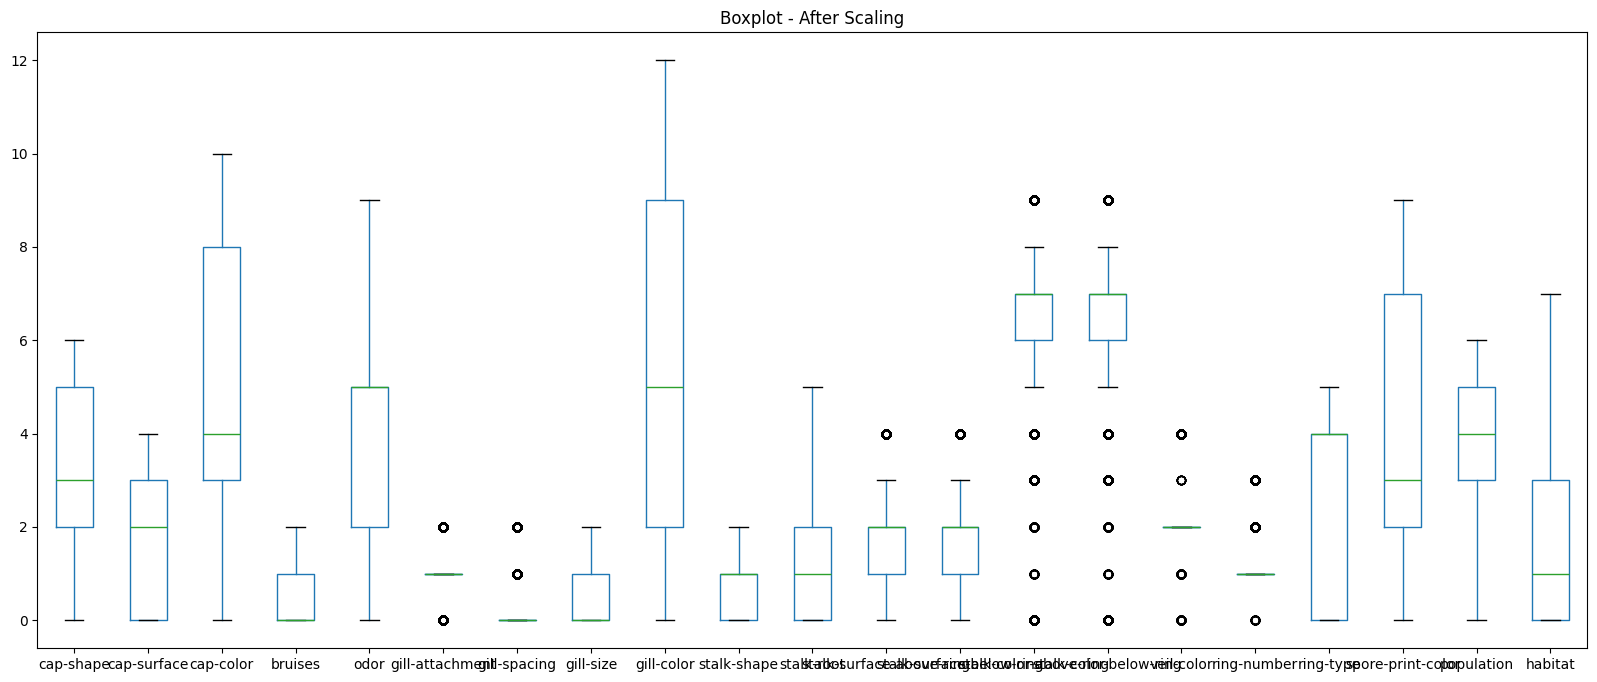

In [ ]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - After Scaling')
plt.show()

# Data Splitting, Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40, stratify=y)

In [ ]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5686 entries, 822 to 3587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 5686 non-null   int64
 1   cap-surface               5686 non-null   int64
 2   cap-color                 5686 non-null   int64
 3   bruises                   5686 non-null   int64
 4   odor                      5686 non-null   int64
 5   gill-attachment           5686 non-null   int64
 6   gill-spacing              5686 non-null   int64
 7   gill-size                 5686 non-null   int64
 8   gill-color                5686 non-null   int64
 9   stalk-shape               5686 non-null   int64
 10  stalk-root                5686 non-null   int64
 11  stalk-surface-above-ring  5686 non-null   int64
 12  stalk-surface-below-ring  5686 non-null   int64
 13  stalk-color-above-ring    5686 non-null   int64
 14  stalk-color-below-ring    5686 non-null   i

In [ ]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 2452 to 2700
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 2438 non-null   int64
 1   cap-surface               2438 non-null   int64
 2   cap-color                 2438 non-null   int64
 3   bruises                   2438 non-null   int64
 4   odor                      2438 non-null   int64
 5   gill-attachment           2438 non-null   int64
 6   gill-spacing              2438 non-null   int64
 7   gill-size                 2438 non-null   int64
 8   gill-color                2438 non-null   int64
 9   stalk-shape               2438 non-null   int64
 10  stalk-root                2438 non-null   int64
 11  stalk-surface-above-ring  2438 non-null   int64
 12  stalk-surface-below-ring  2438 non-null   int64
 13  stalk-color-above-ring    2438 non-null   int64
 14  stalk-color-below-ring    2438 non-null   

In [ ]:
yTrain.info()

<class 'pandas.core.series.Series'>
Index: 5686 entries, 822 to 3587
Series name: class
Non-Null Count  Dtype
--------------  -----
5686 non-null   int64
dtypes: int64(1)
memory usage: 88.8 KB


In [ ]:
yTest.info()

<class 'pandas.core.series.Series'>
Index: 2438 entries, 2452 to 2700
Series name: class
Non-Null Count  Dtype
--------------  -----
2438 non-null   int64
dtypes: int64(1)
memory usage: 38.1 KB


# Models

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(xTrain, yTrain)

ypredDT = modelDT.predict(xTest)

# Accuracy
accuracyDT = round(accuracy_score(yTest, ypredDT) * 100, 2)

print(accuracyDT)

88.15


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(xTrain, yTrain)

ypredRF = modelRF.predict(xTest)

# accuracy
accuracyRF = round(accuracy_score(yTest, ypredRF)*100, 2)

print(accuracyRF)

95.04


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
modelKNN = KNeighborsClassifier(n_neighbors=k)
modelKNN.fit(xTrain, yTrain)

# predict
ypredKNN = modelKNN.predict(xTest)

# accuracy
accuracyKNN = round(accuracy_score(yTest, ypredKNN) * 100, 2)
print(accuracyKNN)

92.62


# Model Comparison

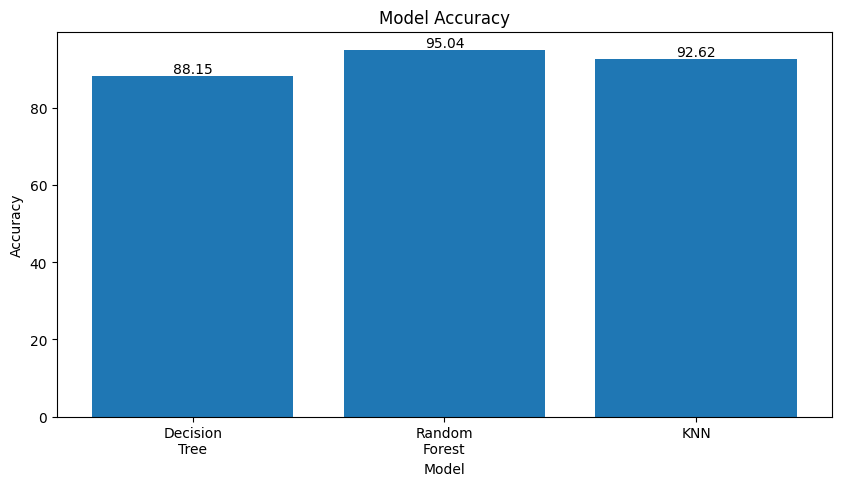

In [ ]:
models = [ 'Decision\nTree', 'Random\nForest', 'KNN' ]
accuracies = [ accuracyDT, accuracyRF, accuracyKNN ]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, tick_label=models)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for i in range(len(models)):
    plt.text(models[i], accuracies[i], str(accuracies[i]), ha='center', va='bottom')

plt.show()

# Precision and Recall Comparison

In [ ]:
# List of models and their predictions
models = [
    ('Decision Tree', ypredDT),
    ('Random Forest', ypredRF),
    ('KNN', ypredKNN)
]

# result matrix
matrix = []

for model, yPred in models:
    precision = precision_score(yTest, yPred, average='weighted', zero_division=1)
    recall = recall_score(yTest, yPred, average='weighted', zero_division=1)

    matrix.append({'Model': model, 'Precision': precision, 'Recall': recall})

# Convert the list of dictionaries to a DataFrame
matrixDF = pd.DataFrame(matrix)
print(matrixDF)

           Model  Precision    Recall
0  Decision Tree   0.899967  0.881460
1  Random Forest   0.904744  0.950369
2            KNN   0.929847  0.926169


# Confusion Matrix

## Decision Tree

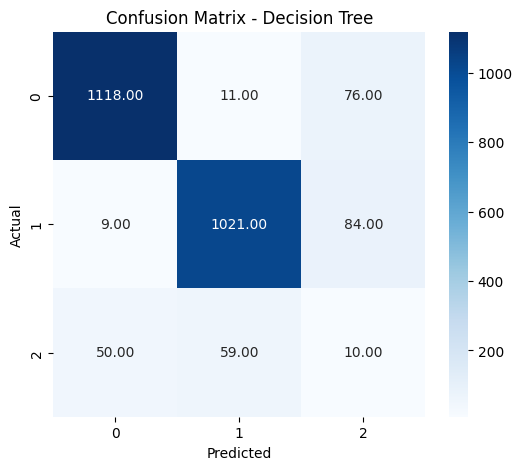

In [ ]:
cmDT = confusion_matrix(yTest, ypredDT)

# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(cmDT, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

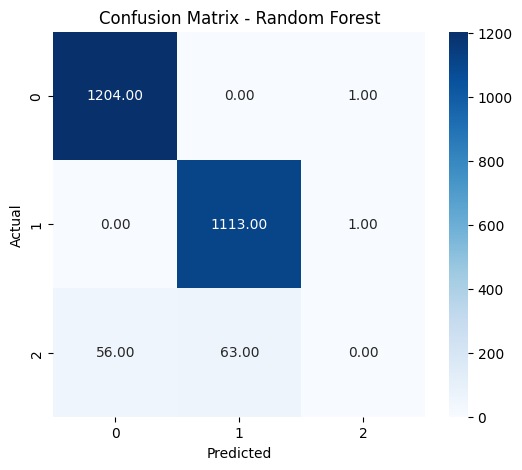

In [ ]:
cmRF = confusion_matrix(yTest, ypredRF)

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cmRF, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

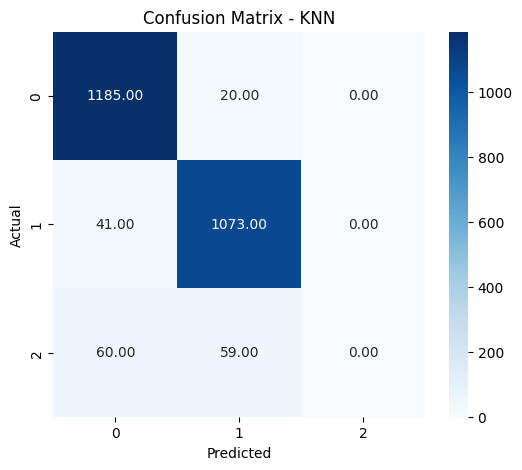

In [ ]:
cmKNN = confusion_matrix(yTest, ypredKNN)

# Plotting the confusion matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(cmKNN, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - KNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()